<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [4]:
# Read Titanic Dataset
titanic_csv = 'titanic.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [6]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [4]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [6]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [7]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [8]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

In [7]:
#Firstly, We want to know the the fraction of each missing attribute
titanic[titanic.columns[titanic.isnull().any()]].isnull().sum()* 100 / titanic.shape[0]

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

#### From the above analyse, It is shown that majority of the missing value are within the Cabin attribute with 77% of total missing values. The Age attribute came 2nd with 19% of total missing values. 

In [11]:
#Secondly, We want to know the fraction of missing values from the date set. In another words, we want to know the outcome 
#if we were to drop missing values.
(titanic.isnull().sum()).sum() / np.product(titanic.shape) * 100 

8.099513655069211

#### The missing values accounted 8% of total data set from titanic.csv. Hence, if we are to drop missing values from the data set it wouldn't effect much of the output or data bias. However, we will only drop data if it is absolutely necessary.  

### Age

In [11]:
# Inspection of missing value in Age attribute
agemissing = titanic[pd.isnull(titanic['Age'])]
agemissing.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NA,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NA,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NA,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NA,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NA,Q


In [24]:
# Compute the fraction of nan values in age attribute over the titanic data
titanic['Age'].isnull().sum() / np.product(titanic.shape)

0.01655443322109989

##### Through data inspection, the missing age values came from many different patterns. We have missing values from the upper class, lower class, different sex, number of siblings/children to Port of Embarkation(Cherbourg, Queenstown, Southampton). As a result, it is fair to conclude that the main reason for the missing values. This could be human error or loss of age documents from the titanic data set. Moreover, the missing values in age attribute accounted for 1.7% of the total data. Therefore, we will convert the missing value cells by the median age of Pclass group because of its correlation coefficient with age.     

In [26]:
# Find correlation coefficient of the entire data set
df_all_corr = titanic.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation Coefficient"}, inplace=True)

# Subset Age for comparison
df_all_corr[df_all_corr['Feature 1'] == "Age"]

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
31,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [7]:
# Print Median Age of Pclass and Sex
ageps = titanic.groupby(["Sex", "Pclass"])['Age'].median()
for pclass in range(1, 4):
    for sex in ['male', 'female']:
        print(f'Median age of Pclass {pclass} {sex}s: {ageps[sex][pclass]}')
print('Median age of all passengers: {}'.format(titanic["Age"].median()))

Median age of Pclass 1 males: 40.0
Median age of Pclass 1 females: 35.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 3 males: 25.0
Median age of Pclass 3 females: 21.5
Median age of all passengers: 28.0


In [8]:
ageps

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [54]:
# Fill the missin values in Age with medians of Sex and Pclass groups
titanic['Age'] = titanic.groupby(["Sex", "Pclass"])["Age"].apply(lambda x: x.fillna(x.median()))

In [55]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

In [80]:
# Inspection of missing value in Cabin attribute
missingcabin = titanic[pd.isnull(titanic['Cabin'])]

In [116]:
missingcabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


In [82]:
missingcabin['Pclass'].value_counts().sort_index()

1     40
2    168
3    479
Name: Pclass, dtype: int64

#### Nearly 70% of missing values in Cabin attribute are from Ticket Class 3(the cheapest price ticket or the lower income passenger). This could be indicated that the population of the lower class onboard titanic were giving bunk bed(more people per cabin), limited single cabin or there were no system for cabin allocation for Ticket Class 3. Also, ticket for class 3 might not link or record passage name(like a cinema ticket). Due to the above possible reason, we will not drop or change the missing value of cabin attribute as this attribute is not important to the question. Moreover, if the cabin does not exist at the begining then there is no point in changing it. In this case, we will change missing values to NA so it looks good on our data.   

In [8]:
titanic['Cabin'] = titanic['Cabin'].fillna('NA')

In [15]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

### Embarked

In [12]:
missing_embark = titanic[pd.isnull(titanic['Embarked'])]
missing_embark

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### There are 2 missing values from the embarked attribute. From the data, they have stayed in the same cabin(B28) from the Pclass 1 ticket with an identical ticket number. We can assume Miss Amelie and Mrs George Nelson are related or known each other. Therefore, they would most likely board the Titanic at the same port. 

#### We could fill this Nan value by the next or previous value from the data set because It possible to say they could board the titanic together with previous passengers at the same port. Also, we can fill the Nan value by the mode of the column's value. 

In [ ]:
#Fill value by backward values
#titanic['Embarked'].fillna(method='bfill', inplace=True)

#### However, i have googled Mrs  George Nelson. ' Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28' 

In [13]:
#Fill S for Southampton
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [32]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Describe

Describe your dataset.

In [35]:
# describe all show summaries for categorical data 
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,3
top,NaN,NaN,NaN,"Goldsmith, Mr. Frank John",male,NaN,NaN,NaN,347082,NaN,NA,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,645
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [36]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

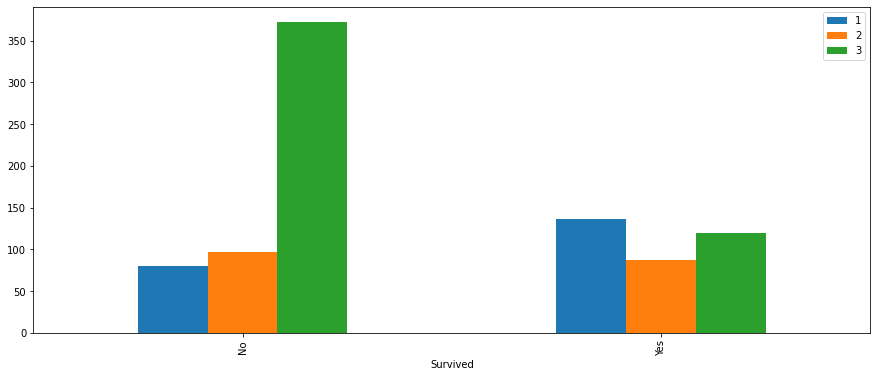

In [37]:
bar_charts(titanic, titanic['Pclass'])

#### The Pclass3 has the most number of death from the titanic event( lower income population was less likely to be rescue than upper class. This is true due to the number of survived from the Upperclass was exceeded midclass and lowerclass.

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

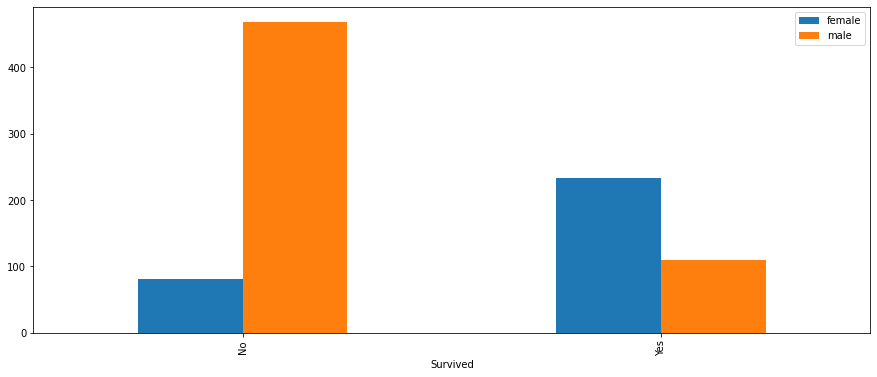

In [39]:
bar_charts(titanic, titanic['Sex'])

#### Number of woman exceeded man in term of survival. Indeed, there were more man die in the event than woman. This could possibly indicated that during the accident women were prioritise to board the life boat and life safety jacket.  

## Parch

Parch = Number of parents of children travelling with each passenger.

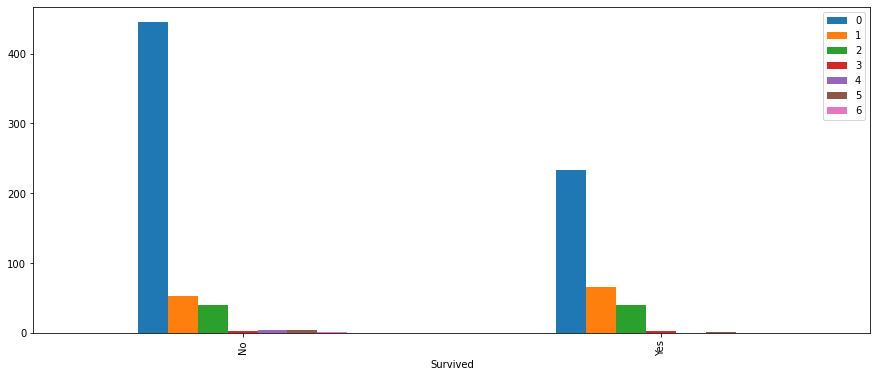

In [40]:
bar_charts(titanic, titanic['Parch'])

#### The most number of dependent with each passenger is 1 either a child or parent. There were number of dependent rescued and death. However, we need to compare to the total dependent to have a better insight. Like the percentage of men, women, child, parents, survived and non-survived  

## SibSp

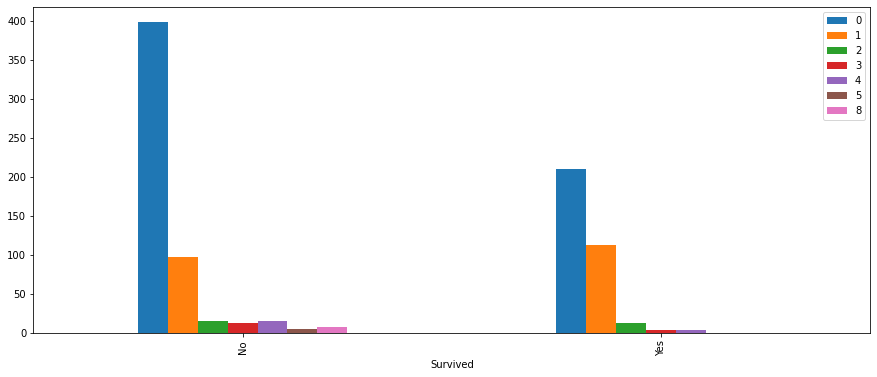

In [42]:
bar_charts(titanic, titanic['SibSp'])

#### Majority of data in this attribute have 1 either husband, wife, brother or sister to the passenger. There were 2 and 3 which indicated there could be families onboard.  

## Embarked

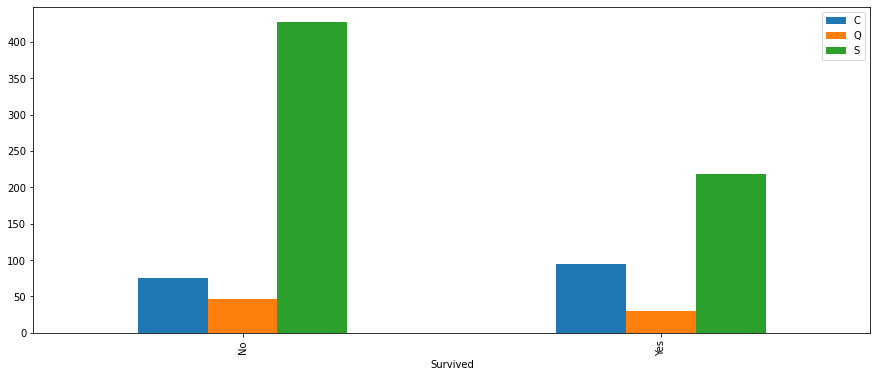

In [43]:
bar_charts(titanic, titanic['Embarked'])

#### Marjority of passenger boarded Titanic from Port Southampton. Miniority from port Cherbourg and Queenstown

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [45]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [65]:
ranges = [0, 10, 20, 30, np.inf]
labels = ['4', '3', '2', '1']
titanic['Fareclass'] = pd.cut(titanic['Fare'], bins=ranges, labels=labels)

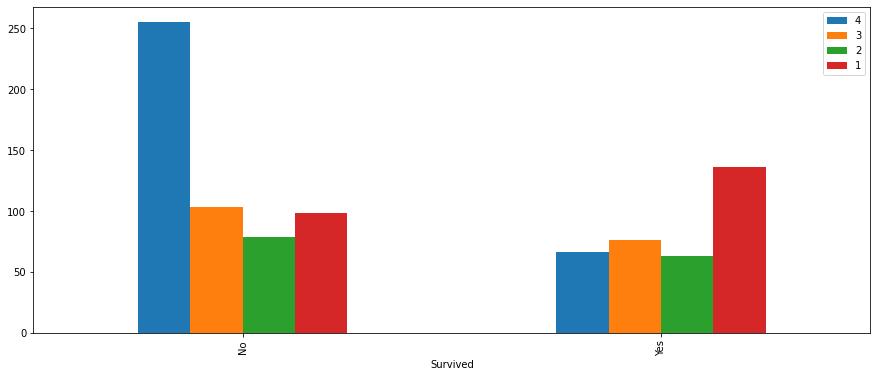

In [54]:
bar_charts(titanic, titanic['Fareclass'])

#### If you are in class 4, then you are most likely to die from the event. In other word,you are more likely to survived if you are from class 1 

## Age Class

In [60]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [62]:
ranges = [0, 16, 25, 35, 60, np.inf]
labels = ['1', '2', '3', '4', '5']
titanic['Ageclass'] = pd.cut(titanic['Fare'], bins=ranges, labels=labels)

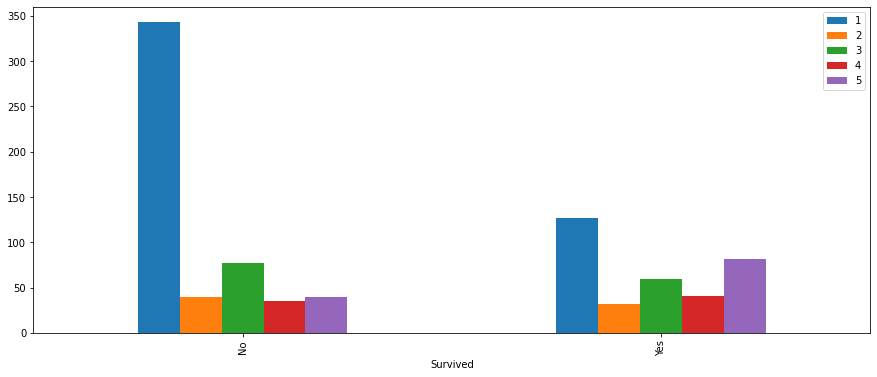

In [63]:
bar_charts(titanic, titanic['Ageclass'])

#### The number of survived and non-survived among age group tend to be similar. However, we do noticed an increase in number of survival from elder. We could agree that during the event children and elder were among the first to be board the lifeboat. But the numbers of children in non-survival are also high nearly 340 count almost 6 times from other age class.   

# Staistical Overview

## Correlation

Find correlation between `survived` and other features.

In [67]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


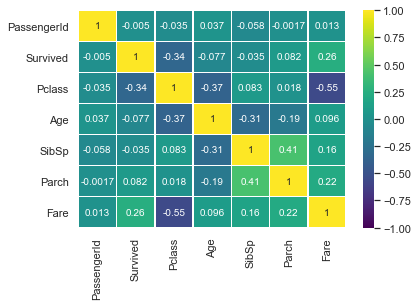

In [56]:
sns.heatmap(titanic.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='viridis', linewidths=0.5, linecolor='white')

#### Bonus: Best attributes for Machine Learning to predict survival could be Pclass and Fare due to its linear relationship. 

# [BONUS] Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [57]:
#Sort data into 2 variables
indices = titanic['Age'] <= 35 
young = titanic[indices]
old = titanic[~indices]

In [58]:
# Slice 100 samples from both variable for Hypothesis 
titanic_young = young.iloc[0:100]
titanic_old = old.iloc[0:100]

In [59]:
print(titanic_young.shape, titanic_old.shape) 

(100, 12) (100, 12)


### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [60]:
# The test statistic can be the different in average of survival rate between the young and old passengers( if there is no
# different then the average mean of survival rate between young and old passengers should be 0)
def diff_mean(data1, data2):
    diff = np.mean(data1) - np.mean(data2)
    return diff

### Calculate point estimate

In [61]:
#Subset data
a = titanic_young['Survived']
b = titanic_old['Survived']

In [62]:
# Define function to generate test samples
def permutation_sample(data1, data2):
    """Concatenate then permutation input data"""
    data = np.concatenate((data1, data2))
    permutated_data = np.random.permutation(data)
    p_sample1 = permutated_data[:len(data1)]
    p_sample2 = permutated_data[len(data1):]
    return p_sample1, p_sample2

In [63]:
# Define function to get 10000 sample replicates
def draw_perm_reps(data1, data2, func, size=1):
    """Generate numbers of replicates from inputs with test statistic"""
    perm_replicates = np.empty(size)
    for i in range(size):
        p_sample1, p_sample2 = permutation_sample(data1, data2)
        perm_replicates[i] = func(p_sample1, p_sample2)
        return perm_replicates

In [91]:
np.mean(a)

0.36

In [92]:
np.mean(b)

0.29

In [66]:
# Find observed data different in mean of survival rate
obs = diff_mean(a, b)
print(obs)

0.07


In [110]:
#Get 10000 sample replicates
perm_replicates = draw_perm_reps(a, b, diff_mean, size=10000)
print(perm_replicates)

[-7.00000000e-002  9.20770195e-312  2.12199579e-314 ...  1.86128468e+089
  1.31590088e+083  1.38300897e+040]


In [111]:
#Find p-value
p = np.sum(perm_replicates >= obs)/ len(perm_replicates)
print(p)

0.2751


#### Our p-value is 0.275 and it is larger than alpha (0.275 < 0.05). Therefore, we have fail to reject the null hypothesis. We can state " There is a no different in survival rate between young and old passengers.   

### Alternative method using Scipy.stats and t-tests

In [67]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

### Calculate test statistic

In [70]:
## Calculate the t-statistics
N = 100
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
print(t)

1.0544428124558762


### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [115]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2
from scipy import stats
#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
print(f'Degrees of freedom: {df}, P-value: {p}')

Degrees of freedom: 198, P-value: 0.14648260834989246


In [73]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 1.0544428124558762
p = 0.2929652166997849


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [74]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [76]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))
alpha = 0.05
print_sig(p2, alpha)

t = 1.0544428124558762
p = 0.29296521669978487
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



